In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("credit_risk_dataset.csv")
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
data.shape

(32581, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Finding Duplicates
data.duplicated().sum()

165

In [6]:
# Dropping Duplicates
data.drop_duplicates(inplace=True)

In [7]:
# Finding Duplicates
data.duplicated().sum()

0

In [8]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [10]:
## Fill Nulls in employment length with Median
median = data['person_emp_length'].median()
median

4.0

In [11]:
data['person_emp_length'] = data['person_emp_length'].fillna(value=data['person_emp_length'].median())

In [12]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
# To fill intrest rate we will use iterative imputer based on loan amount column
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_imp = IterativeImputer()
imp_array = iter_imp.fit_transform(data[['loan_amnt','loan_int_rate']])
imp_array

data[['loan_amnt','loan_int_rate']] = imp_array

In [14]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000.0,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000.0,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000.0,14.27,1,0.55,Y,4


In [15]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.768880,9593.845632,11.017733,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.090411,6322.730241,3.086626,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  float64
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 3.2+ MB


In [17]:
data['person_age'].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67], dtype=int64)

In [18]:
data['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,  20.,
        22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,  34.,
        29.,  38.,  30.])

In [19]:
# Only keep rows where age is less than or equal to 100
data = data[data['person_age'] <= 100]

In [20]:
# Only keep rows where employment in yeras is less than or equal to 50
data = data[data['person_emp_length'] <= 55]

In [21]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000.0,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000.0,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500.0,7.14,1,0.25,N,2


In [22]:
data['person_age'].unique()

array([21, 25, 23, 24, 26, 22, 20, 32, 34, 29, 33, 28, 35, 31, 27, 30, 36,
       40, 50, 45, 37, 39, 44, 43, 41, 46, 38, 47, 42, 48, 49, 58, 65, 51,
       53, 66, 61, 54, 57, 59, 62, 60, 55, 52, 64, 70, 78, 69, 56, 73, 63,
       94, 80, 84, 76, 67], dtype=int64)

In [23]:
data['person_emp_length'].unique()

array([ 5.,  1.,  4.,  8.,  2.,  6.,  7.,  0.,  9.,  3., 10., 11., 18.,
       12., 17., 14., 16., 13., 19., 15., 20., 22., 21., 24., 23., 26.,
       25., 27., 28., 31., 41., 34., 29., 38., 30.])

In [24]:
# Both the columns i.e. person_age,person_emp_length have outliers

In [25]:
#outliers Detection

numerical_col = data.select_dtypes(include=['int64','float64']).columns

In [26]:
numerical_col

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

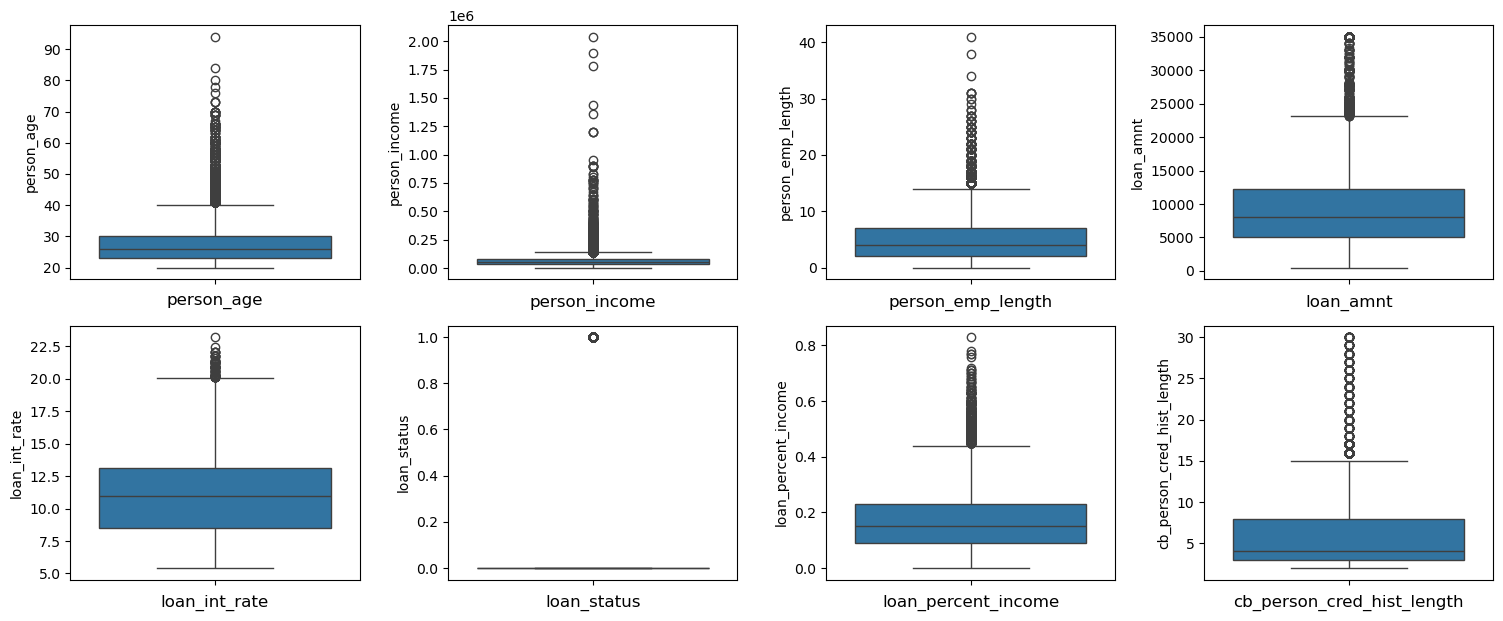

In [27]:
plt.figure(figsize=(15,9))
plotnum = 1
for col in numerical_col:
    if plotnum <=12:
        ax = plt.subplot(3,4,plotnum)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=12)

    plotnum +=1
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

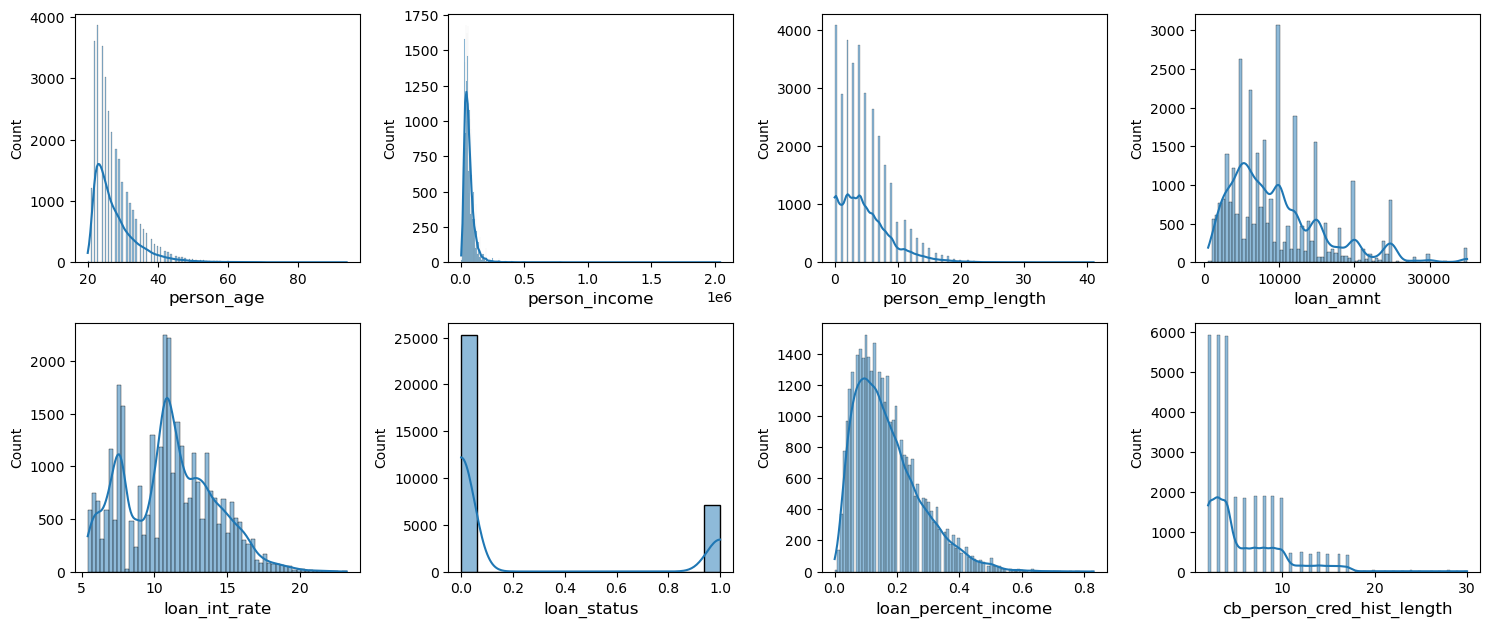

In [28]:
# Univariate Analysis
plt.suptitle('Univariate Analysis',fontsize=20)
plt.figure(figsize=(15,9))
plotnum = 1
for col in numerical_col:
    if plotnum <=12:
        ax = plt.subplot(3,4,plotnum)
        sns.histplot(data[col],kde=True)
        plt.xlabel(col,fontsize=12)

    plotnum +=1
plt.tight_layout()

In [29]:
## Almost Every Feature is Right skewed,highly right skewed and not considering categorical features

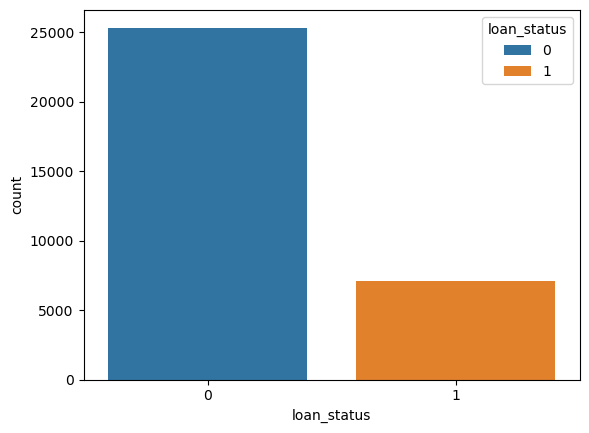

In [30]:
#Target label
sns.countplot(data= data, x = 'loan_status',hue='loan_status')
plt.show()

In [31]:
data.shape

(32409, 12)

# Sprint 2

In [33]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [34]:
# Input Variables
X = data.drop('loan_status',axis=1)
# Target Labels
y = data.loan_status

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24306, 11) (24306,)
(8103, 11) (8103,)


In [37]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [38]:
# Separate Categorical data and Numerical Data
X_train_cat = X_train.select_dtypes(include=['object'])# Categorical
X_train_num = X_train.select_dtypes(include=['int64','float64'])#Numerical                                    

In [39]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
12535,MORTGAGE,DEBTCONSOLIDATION,A,N
11522,RENT,PERSONAL,B,N
11874,RENT,MEDICAL,B,N
8949,RENT,EDUCATION,A,N
17603,RENT,VENTURE,A,N


In [40]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12535,26,82305,10.0,18600.0,6.99,0.23,2
11522,24,65000,3.0,10000.0,12.42,0.15,2
11874,23,94000,0.0,10000.0,9.45,0.11,3
8949,23,50000,0.0,8000.0,7.49,0.16,4
17603,21,18000,1.0,3200.0,8.49,0.18,2


In [41]:
## Working on Categorical data
print('Ownership :' , X_train_cat['person_home_ownership'].unique())
print('Loan Intent :',  X_train_cat['loan_intent'].unique())
print('Loan Grade :', X_train_cat['loan_grade'].unique())
print('Default :', X_train_cat['cb_person_default_on_file'].unique())

Ownership : ['MORTGAGE' 'RENT' 'OWN' 'OTHER']
Loan Intent : ['DEBTCONSOLIDATION' 'PERSONAL' 'MEDICAL' 'EDUCATION' 'VENTURE'
 'HOMEIMPROVEMENT']
Loan Grade : ['A' 'B' 'C' 'D' 'E' 'F' 'G']
Default : ['N' 'Y']


In [42]:
X_train_cat['cb_person_default_on_file'] = X_train_cat['cb_person_default_on_file'].replace({'Y':1,'N':0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_15944\2067941853.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_cat['cb_person_default_on_file'] = X_train_cat['cb_person_default_on_file'].replace({'Y':1,'N':0})


In [46]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [48]:
ord_enc = OrdinalEncoder(categories=[['G','F','E','D','C','B','A']],dtype='int64')
encoded_grades = ord_enc.fit_transform(X_train_cat[['loan_grade']])

# Now, encoded_grades is G=0.0, F=1.0, ..., A=6.0

# Shift the scale to be 1 to 7 (Add 1 to the result)
X_train_cat['loan_grade'] = encoded_grades + 1
# This results in: G=1.0, F=2.0, E=3.0, D=4.0, C=5.0, B=6.0, A=7.0 (Highest number = Lowest risk)

print(X_train_cat['loan_grade'].head())

12535    7
11522    6
11874    6
8949     7
17603    7
Name: loan_grade, dtype: int64


In [50]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
12535,MORTGAGE,DEBTCONSOLIDATION,7,0
11522,RENT,PERSONAL,6,0
11874,RENT,MEDICAL,6,0
8949,RENT,EDUCATION,7,0
17603,RENT,VENTURE,7,0


In [52]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_intents = encoder.fit_transform(X_train_cat[['loan_intent']])
encoded_df = pd.DataFrame(encoded_intents,columns=encoder.get_feature_names_out(['loan_intent']),index= X_train_cat.index)
X_train_cat = pd.concat([X_train_cat, encoded_df], axis=1)

# 5. Drop the original 'loan_intent' column
# It is now redundant and no longer needed for modeling.
X_train_cat.drop(columns=['loan_intent'], inplace=True)

# Verification
print("Columns added:", encoded_df.columns.tolist())
print("\nFirst 5 rows of the updated DataFrame (showing new columns):")
print(X_train_cat.tail(5))

Columns added: ['loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']

First 5 rows of the updated DataFrame (showing new columns):
      person_home_ownership  loan_grade  cb_person_default_on_file  \
27029              MORTGAGE           7                          0   
7991               MORTGAGE           6                          0   
18815                  RENT           6                          0   
19904              MORTGAGE           7                          0   
14154              MORTGAGE           6                          0   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
27029                            0.0                    0.0   
7991                             0.0                    0.0   
18815                            0.0                    0.0   
19904                            0.0                    0.0   
14154                      

In [54]:
X_train_cat.columns

Index(['person_home_ownership', 'loan_grade', 'cb_person_default_on_file',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [56]:
encoded_ownership = encoder.fit_transform(X_train_cat[['person_home_ownership']])
encoded_df1 = pd.DataFrame(encoded_ownership,columns=encoder.get_feature_names_out(['person_home_ownership']),index= X_train_cat.index)
X_train_cat = pd.concat([X_train_cat, encoded_df1], axis=1)


X_train_cat.drop(columns=['person_home_ownership'], inplace=True)

In [58]:
X_train_cat.columns

Index(['loan_grade', 'cb_person_default_on_file',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT'],
      dtype='object')

In [60]:
## Now working on test data
# Separate Categorical data and Numerical Data
X_test_cat = X_test.select_dtypes(include=['object'])# Categorical
X_test_num = X_test.select_dtypes(include=['int64','float64'])#Numerical                                    

In [62]:
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
23682,MORTGAGE,VENTURE,A,N
14614,RENT,PERSONAL,B,N
21910,RENT,VENTURE,A,N
29352,MORTGAGE,HOMEIMPROVEMENT,B,N
1160,RENT,PERSONAL,D,Y


In [68]:
## Working on Categorical data
print('Ownership :' , X_test_cat['person_home_ownership'].unique())
print('Loan Intent :',  X_test_cat['loan_intent'].unique())
print('Loan Grade :', X_test_cat['loan_grade'].unique())
print('Default :', X_test_cat['cb_person_default_on_file'].unique())

Ownership : ['MORTGAGE' 'RENT' 'OWN' 'OTHER']
Loan Intent : ['VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT' 'EDUCATION' 'DEBTCONSOLIDATION'
 'MEDICAL']
Loan Grade : ['A' 'B' 'D' 'C' 'G' 'E' 'F']
Default : [0 1]


In [70]:
X_test_cat['cb_person_default_on_file'] = X_test_cat['cb_person_default_on_file'].replace({'Y':1,'N':0})

In [72]:
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
23682,MORTGAGE,VENTURE,A,0
14614,RENT,PERSONAL,B,0
21910,RENT,VENTURE,A,0
29352,MORTGAGE,HOMEIMPROVEMENT,B,0
1160,RENT,PERSONAL,D,1


In [76]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
ord_enc = OrdinalEncoder(categories=[['G','F','E','D','C','B','A']],dtype='int64')
encoded_grades = ord_enc.fit_transform(X_test_cat[['loan_grade']])

# Now, encoded_grades is G=0.0, F=1.0, ..., A=6.0

# Shift the scale to be 1 to 7 (Add 1 to the result)
X_test_cat['loan_grade'] = encoded_grades + 1
# This results in: G=1.0, F=2.0, E=3.0, D=4.0, C=5.0, B=6.0, A=7.0 (Highest number = Lowest risk)

print(X_test_cat['loan_grade'].head())

23682    7
14614    6
21910    7
29352    6
1160     4
Name: loan_grade, dtype: int64


In [78]:
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
23682,MORTGAGE,VENTURE,7,0
14614,RENT,PERSONAL,6,0
21910,RENT,VENTURE,7,0
29352,MORTGAGE,HOMEIMPROVEMENT,6,0
1160,RENT,PERSONAL,4,1


In [80]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_intents = encoder.fit_transform(X_test_cat[['loan_intent']])
encoded_df = pd.DataFrame(encoded_intents,columns=encoder.get_feature_names_out(['loan_intent']),index= X_test_cat.index)
X_test_cat = pd.concat([X_test_cat, encoded_df], axis=1)

# 5. Drop the original 'loan_intent' column
# It is now redundant and no longer needed for modeling.
X_test_cat.drop(columns=['loan_intent'], inplace=True)

# Verification
print("Columns added:", encoded_df.columns.tolist())
print("\nFirst 5 rows of the updated DataFrame (showing new columns):")
print(X_test_cat.tail(5))

Columns added: ['loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']

First 5 rows of the updated DataFrame (showing new columns):
      person_home_ownership  loan_grade  cb_person_default_on_file  \
31980                  RENT           5                          0   
9879                   RENT           4                          1   
24086              MORTGAGE           5                          0   
5993               MORTGAGE           7                          0   
25372              MORTGAGE           7                          0   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
31980                            0.0                    0.0   
9879                             0.0                    1.0   
24086                            0.0                    1.0   
5993                             0.0                    0.0   
25372                      

In [82]:
encoded_ownership = encoder.fit_transform(X_test_cat[['person_home_ownership']])
encoded_df1 = pd.DataFrame(encoded_ownership,columns=encoder.get_feature_names_out(['person_home_ownership']),index= X_test_cat.index)
X_test_cat = pd.concat([X_test_cat, encoded_df1], axis=1)


X_test_cat.drop(columns=['person_home_ownership'], inplace=True)

In [84]:
X_test_cat.columns == X_train_cat.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

# Working on Numerical Data

In [89]:
X_train_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12535,26,82305,10.0,18600.0,6.990000,0.23,2
11522,24,65000,3.0,10000.0,12.420000,0.15,2
11874,23,94000,0.0,10000.0,9.450000,0.11,3
8949,23,50000,0.0,8000.0,7.490000,0.16,4
17603,21,18000,1.0,3200.0,8.490000,0.18,2
...,...,...,...,...,...,...,...
27029,27,120000,4.0,8400.0,7.140000,0.07,8
7991,21,55000,0.0,10000.0,10.250000,0.18,2
18815,29,55000,3.0,1200.0,9.990000,0.02,6
19904,33,36500,4.0,8500.0,10.935246,0.23,6


### Transformation on Train data

In [91]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12535,-0.280709,0.300595,1.310657,1.418068,-1.304822,0.555228,-0.937639
11522,-0.602833,-0.021419,-0.439018,0.059345,0.455352,-0.191817,-0.937639
11874,-0.763895,0.518217,-1.188878,0.059345,-0.507395,-0.565340,-0.691546
8949,-0.763895,-0.300540,-1.188878,-0.256637,-1.142743,-0.098437,-0.445452
17603,-1.086019,-0.896000,-0.938925,-1.014994,-0.818586,0.088325,-0.937639


In [95]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,cb_person_default_on_file,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
12535,-0.280709,0.300595,1.310657,1.418068,-1.304822,0.555228,-0.937639,7,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11522,-0.602833,-0.021419,-0.439018,0.059345,0.455352,-0.191817,-0.937639,6,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11874,-0.763895,0.518217,-1.188878,0.059345,-0.507395,-0.565340,-0.691546,6,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8949,-0.763895,-0.300540,-1.188878,-0.256637,-1.142743,-0.098437,-0.445452,7,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17603,-1.086019,-0.896000,-0.938925,-1.014994,-0.818586,0.088325,-0.937639,7,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Transformation on test Data

In [97]:
# Apply transformation on Numerical data

X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                   columns = std_scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
23682,-0.119647,-0.021419,1.560610,-0.098646,-1.087637,-0.285198,0.046736
14614,-0.602833,-0.449405,-0.938925,-1.204583,0.542874,-1.125624,-0.445452
21910,-0.119647,0.276311,-1.188878,-0.572619,-1.256198,-0.938863,0.785018
29352,1.652036,-0.786807,-1.188878,-0.296134,0.491009,1.395654,2.015487
1160,-1.086019,-0.319148,-0.688971,1.157383,2.345188,1.675796,-0.445452


In [101]:
# Concatinate X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,cb_person_default_on_file,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
23682,-0.119647,-0.021419,1.560610,-0.098646,-1.087637,-0.285198,0.046736,7,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
14614,-0.602833,-0.449405,-0.938925,-1.204583,0.542874,-1.125624,-0.445452,6,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21910,-0.119647,0.276311,-1.188878,-0.572619,-1.256198,-0.938863,0.785018,7,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29352,1.652036,-0.786807,-1.188878,-0.296134,0.491009,1.395654,2.015487,6,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1160,-1.086019,-0.319148,-0.688971,1.157383,2.345188,1.675796,-0.445452,4,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [105]:
y_train.unique()

array([0, 1], dtype=int64)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  confusion_matrix,classification_report,accuracy_score,f1_score

In [138]:
# Initiate KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric="euclidean")

#Model Training
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier(metric='euclidean')

In [123]:
from sklearn import metrics

In [154]:
y_test_pred = knn.predict(X_test_transformed)



In [156]:
print(f"--- KNN Model Evaluation (K=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 Score (Default Class): {f1_score(y_test, y_test_pred):.4f}") # Good for imbalanced data
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

--- KNN Model Evaluation (K=5) ---
Accuracy: 0.8881
F1 Score (Default Class): 0.7012

Confusion Matrix:
[[6132  216]
 [ 691 1064]]


In [174]:
score_test = knn.score(X_train_transformed, y_train)
score_test

0.9162758166707808

# Navie Bayes

In [168]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# --- 1. Initialize the Model ---
# GaussianNB is the best choice for continuous (scaled) data.
model_nb = GaussianNB()

# --- 2. Train the Model ---
model_nb.fit(X_train_transformed, y_train)

# --- 3. Make Predictions ---
# Predict the class labels (0 or 1)
y_pred_nb = model_nb.predict(X_test_transformed)

# Predict the probability of default (Class 1) for AUC-ROC calculation
y_pred_proba_nb = model_nb.predict_proba(X_test_transformed)[:, 1]

# --- 4. Evaluate the Model ---
print("--- Naive Bayes Model Evaluation ---")
#print(f"Accuracy on train : {accuracy_score(X_train_transformed, y_train):.4f}")
#print(f"Accuracy on test : {accuracy_score(X_test_transformed, y_test):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

--- Naive Bayes Model Evaluation ---
Accuracy: 0.8054

Confusion Matrix:
[[5288 1060]
 [ 517 1238]]


In [176]:
score_nb = model_nb.score(X_train_transformed, y_train)
score_nb

0.8062206862503085

## Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Credit Risk Scoring.


C:\Users\DELL\AppData\Local\Temp\ipykernel_15944\92508062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Accuracy', data=df_scores, palette='viridis')


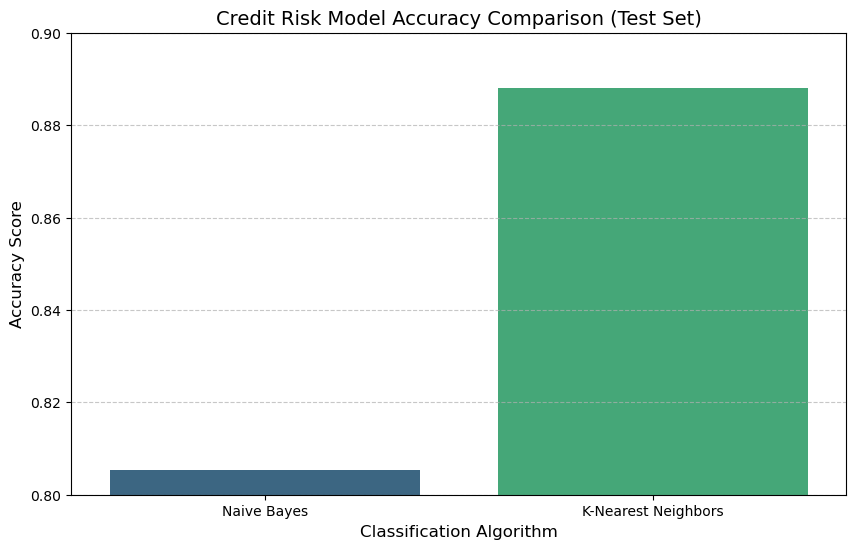

In [181]:
model_scores = {
    'Algorithm': ['Naive Bayes', 'K-Nearest Neighbors'],
    'Accuracy': [0.8054, 0.8881],  # Example Accuracy Scores
}

df_scores = pd.DataFrame(model_scores)
plt.figure(figsize=(10, 6))
# Use Accuracy as the metric for comparison
sns.barplot(x='Algorithm', y='Accuracy', data=df_scores, palette='viridis')


plt.ylim(0.80, 0.90) # Adjust limits for better visual comparison of accuracy
plt.title('Credit Risk Model Accuracy Comparison (Test Set)', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Classification Algorithm', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Final Conclusion - Knn is performing more better than Naive Bayes